In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import f_oneway, stats

In [55]:
df = pd.read_csv('clustering_kmeans.csv')
df 

,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,Hardness
0,100.0,7.558488,4.800000,12.040830,2.755000,-1.224308,0.074271,-0.379823,0.083014,6.5
1,76.0,8.885992,5.600000,12.086300,2.828000,-0.321924,0.029238,-0.251617,0.128897,2.5
2,100.0,8.795296,4.800000,10.948500,2.648000,-1.146938,0.094446,-0.448528,0.047033,6.0
3,116.0,9.577996,4.800000,11.824480,2.766000,-0.746181,0.087805,-0.131870,-0.272518,6.0
4,131.0,24.529328,4.666667,11.948200,2.858333,0.650988,0.498949,0.228052,0.043948,6.0
...,...,...,...,...,...,...,...,...,...,...
9690,104.0,11.202328,4.666667,11.408267,2.736667,0.223466,-0.117071,-0.265490,0.088662,6.8
9691,128.0,7.558488,4.000000,11.330440,2.644000,-0.834660,0.199806,0.028256,-0.180184,4.0
9692,196.0,30.920000,5.500000,10.074300,2.295000,0.766877,0.669752,0.137073,0.594841,1.8
9693,38.0,1.553160,4.666667,11.290033,2.743333,-0.546023,-0.250037,-0.706767,0.190659,6.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   allelectrons_Total  9695 non-null   float64
 1   density_Total       9695 non-null   float64
 2   val_e_Average       9695 non-null   float64
 3   ionenergy_Average   9695 non-null   float64
 4   el_neg_chi_Average  9695 non-null   float64
 5   PCA_Component_1     9695 non-null   float64
 6   PCA_Component_2     9695 non-null   float64
 7   PCA_Component_3     9695 non-null   float64
 8   PCA_Component_4     9695 non-null   float64
 9   Hardness            9695 non-null   float64
dtypes: float64(10)
memory usage: 757.6 KB


In [56]:
Hardness = df['Hardness']
df = df.drop('Hardness', axis = 1)

In [57]:
# Preservar nombre de columnas
column_names = df.columns.tolist()

In [58]:
# Escalado
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [60]:
df

array([[-0.19758762, -0.63694033,  0.38605846, ...,  0.28712437,
        -0.503408  ,  0.18720527],
       [-0.50220159, -0.48680715,  1.8449165 , ...,  0.1955307 ,
        -0.32992093,  0.28077472],
       [-0.19758762, -0.49706435,  0.38605846, ...,  0.32816024,
        -0.59637804,  0.11382812],
       ...,
       [ 1.02086826,  2.00511437,  1.66255925, ...,  1.49830014,
         0.19604923,  1.23098601],
       [-0.98450704, -1.31610892,  0.14291545, ..., -0.37249962,
        -0.94582439,  0.40672902],
       [ 2.18855515,  1.29661545, -0.03075813, ..., -0.55185269,
        -0.83657454, -0.01034159]])

### K-means

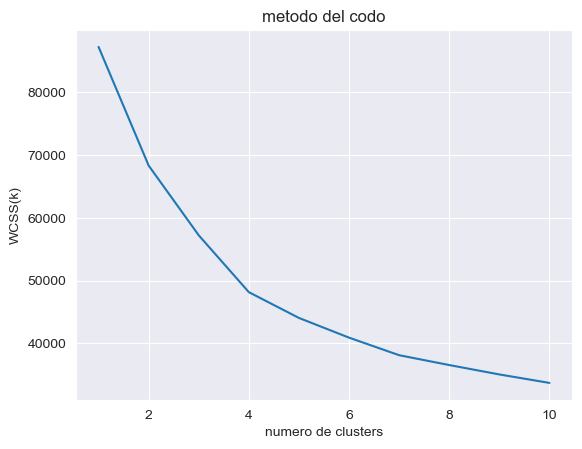

In [17]:
#sumatorio de cluster respecto a puntos y distancia a su centro
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    #añadimos al final de wcss el sumatorio de los cuadrados de la distancia de k (inertia_)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('metodo del codo')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS(k)')
plt.show()

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


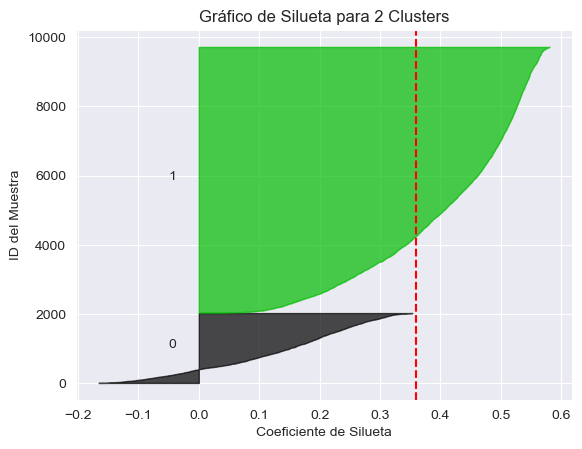

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


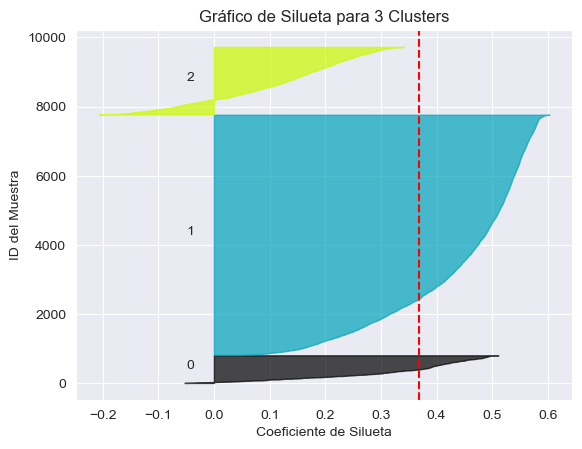

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


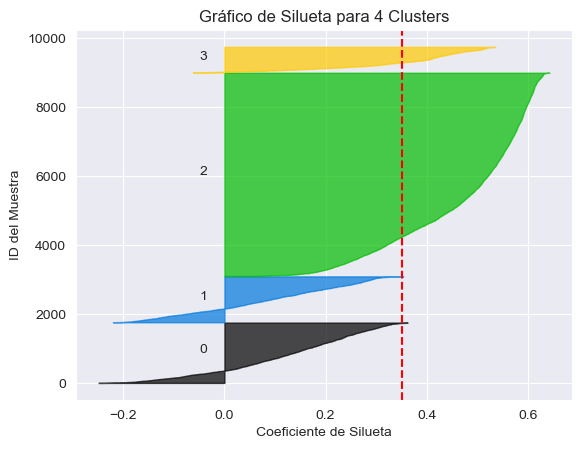

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


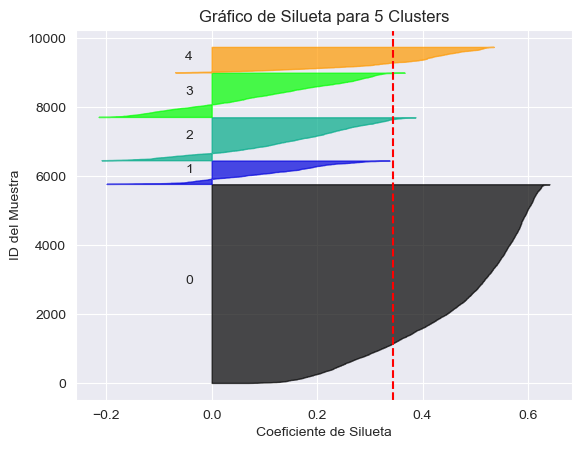

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


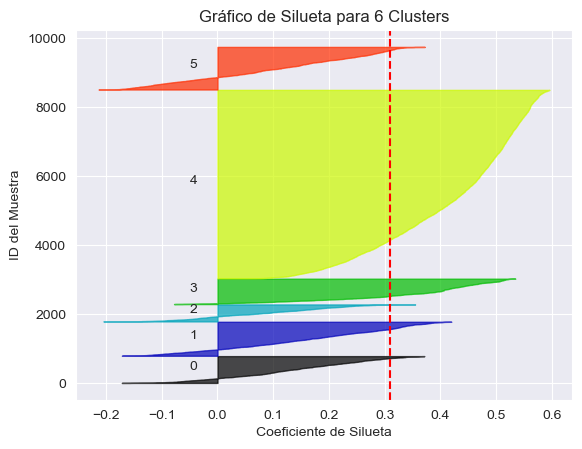

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


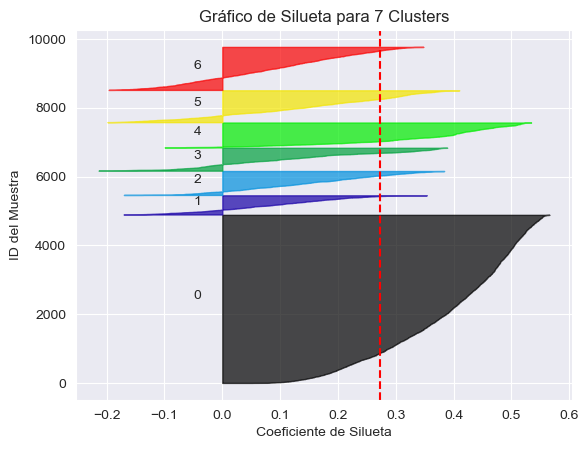

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


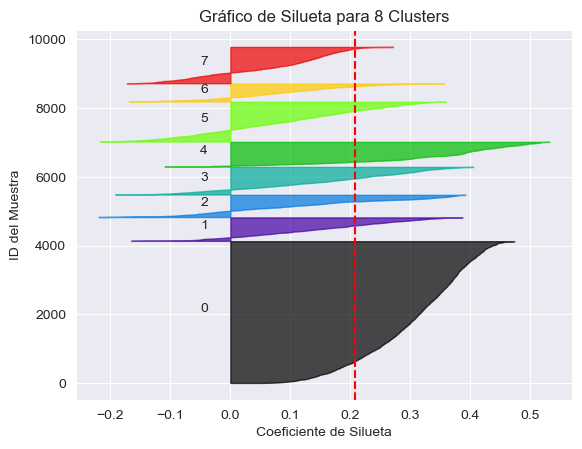

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


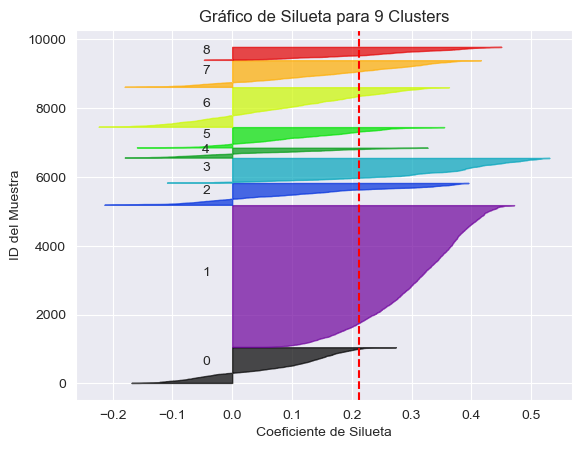

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


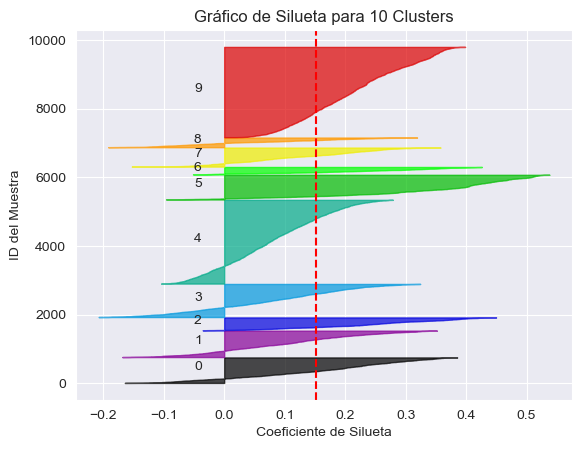

In [18]:
# Número de clusters a probar
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Crea un objeto KMeans con el número actual de clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # Calcula el valor promedio de la silueta para todos los puntos
    silhouette_avg = silhouette_score(df, cluster_labels)

    # Calcula la silueta de cada punto
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    # Crea el gráfico de silueta
    plt.figure()
    plt.title(f"Gráfico de Silueta para {n_clusters} Clusters")
    plt.xlabel("Coeficiente de Silueta")
    plt.ylabel("ID del Muestra")

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

In [61]:
# Prueba con 7 cluster
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [62]:
for i in range(len(y_kmeans)) :
    print(i,'=',y_kmeans[i])

0 = 0
1 = 0
2 = 0
3 = 0
4 = 6
5 = 0
6 = 4
7 = 0
8 = 0
9 = 0
10 = 0
11 = 5
12 = 5
13 = 0
14 = 0
15 = 6
16 = 0
17 = 0
18 = 6
19 = 0
20 = 5
21 = 4
22 = 0
23 = 6
24 = 1
25 = 1
26 = 0
27 = 0
28 = 0
29 = 6
30 = 2
31 = 0
32 = 0
33 = 0
34 = 0
35 = 2
36 = 1
37 = 6
38 = 4
39 = 6
40 = 6
41 = 0
42 = 0
43 = 5
44 = 0
45 = 0
46 = 6
47 = 4
48 = 1
49 = 0
50 = 0
51 = 3
52 = 6
53 = 1
54 = 0
55 = 4
56 = 6
57 = 0
58 = 0
59 = 0
60 = 4
61 = 3
62 = 3
63 = 0
64 = 6
65 = 0
66 = 0
67 = 2
68 = 6
69 = 2
70 = 0
71 = 0
72 = 6
73 = 6
74 = 6
75 = 6
76 = 2
77 = 6
78 = 6
79 = 5
80 = 1
81 = 0
82 = 0
83 = 0
84 = 0
85 = 0
86 = 0
87 = 0
88 = 0
89 = 1
90 = 1
91 = 6
92 = 0
93 = 0
94 = 0
95 = 6
96 = 0
97 = 2
98 = 0
99 = 0
100 = 0
101 = 0
102 = 0
103 = 0
104 = 0
105 = 0
106 = 1
107 = 6
108 = 4
109 = 0
110 = 0
111 = 0
112 = 3
113 = 6
114 = 0
115 = 0
116 = 0
117 = 4
118 = 1
119 = 0
120 = 3
121 = 0
122 = 5
123 = 0
124 = 0
125 = 0
126 = 0
127 = 0
128 = 3
129 = 0
130 = 1
131 = 0
132 = 5
133 = 3
134 = 3
135 = 2
136 = 0
137 = 0
138 = 

In [63]:
# transformar a series de pandas(dataframe)
df = pd.DataFrame(df, columns= column_names)

In [64]:
df['cluster'] = list(y_kmeans)

In [65]:
df.head()

,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,cluster
0,-0.197588,-0.636940,0.386058,1.051762,0.507442,-0.657831,0.287124,-0.503408,0.187205,0
1,-0.502202,-0.486807,1.844917,1.099682,0.809657,-0.162736,0.195531,-0.329921,0.280775,0
2,-0.197588,-0.497064,0.386058,-0.099423,0.064470,-0.615381,0.328160,-0.596378,0.113828,0
3,0.005488,-0.408545,0.386058,0.823755,0.552982,-0.395506,0.314653,-0.167880,-0.537839,0
4,0.195872,1.282366,0.142915,0.954141,0.935235,0.371053,1.150897,0.319162,0.107537,6


In [66]:
# nivel de significancia en nueva caracteristica cluster
df['Hardness'] = Hardness
df_anova = df
anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-Value'])

for feature in df_anova.columns:
    f_statistic, p_value = f_oneway(df_anova[feature], df_anova['Hardness'])
    anova_results = pd.concat([anova_results, pd.DataFrame({'Feature': [feature], 'F-Statistic': [f_statistic], 'P-Value': [p_value]})], ignore_index=True)
    
anova_results.sort_values(by='P-Value', ascending=True, inplace=True)
print(anova_results)

               Feature   F-Statistic  P-Value
0   allelectrons_Total  5.738374e+04      0.0
1        density_Total  5.738374e+04      0.0
2        val_e_Average  5.738374e+04      0.0
3    ionenergy_Average  5.738374e+04      0.0
4   el_neg_chi_Average  5.738374e+04      0.0
5      PCA_Component_1  5.738374e+04      0.0
6      PCA_Component_2  5.738374e+04      0.0
7      PCA_Component_3  5.738374e+04      0.0
8      PCA_Component_4  5.738374e+04      0.0
9              cluster  9.134189e+03      0.0
10            Hardness  3.011006e-30      1.0


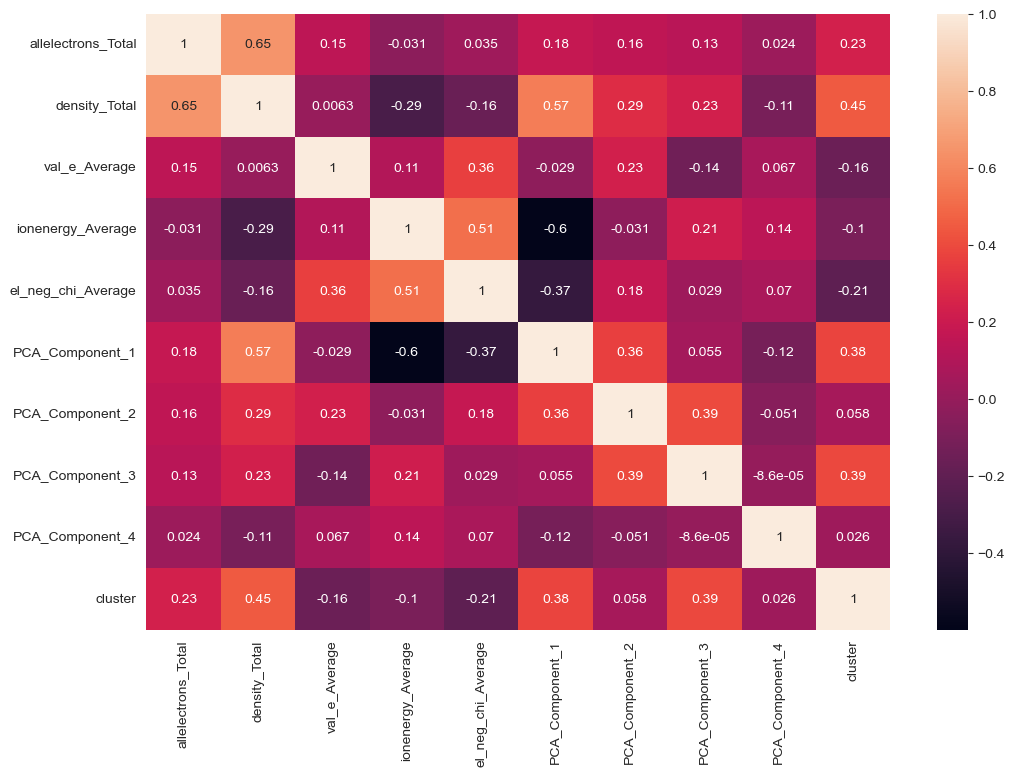

In [68]:
matrix_corr = df.drop('Hardness', axis = 1).corr(method='spearman')
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()